In [1]:
import pandas as pd
from google.cloud import bigquery

import matplotlib.pyplot as plt

client = bigquery.Client()

#Residentes com Plano de saude

In [2]:
residentes_com_plano = """
select
 pk_indicador
,indicador
,nivel_territorio
,abertura_territorio
,variavel_abertura_1
,case when categoria_abertura_1 like '%59%' then 'ate 59 anos' else 'mais 60 anos' end as categoria_abertura_1
,variavel_abertura_2
,categoria_abertura_2
,cast(replace(maio,' ','') as int) as maio
,cast(replace(junho,' ','') as int) as junho
,cast(replace(julho,' ','') as int) as julho
 from `pnad_covid.tb_pais`
where
tipo_dado = 'quantidade' and
maio is not null and junho is not null and julho is not null
and pk_indicador = 126
and variavel_abertura_1 = 'Grupos de Idade 2'
and categoria_abertura_2 is not null
order by variavel_abertura_1,indicador
"""

df_residentes_com_plano= client.query(residentes_com_plano).to_dataframe()

In [3]:
df_60 = df_residentes_com_plano[df_residentes_com_plano['categoria_abertura_1'].isin(['mais 60 anos'])]

In [4]:
df_60 = df_60[['categoria_abertura_2','maio','junho','julho']]

In [5]:
df_melt_60 = pd.melt(df_60,id_vars=['categoria_abertura_2'],var_name='mes',value_name='qtd')

In [6]:
df_melt_60

,categoria_abertura_2,mes,qtd
0,Não tem plano de saúde médico,maio,19631
1,Tem plano de saúde médico,maio,10258
2,Não tem plano de saúde médico,junho,20236
3,Tem plano de saúde médico,junho,9635
4,Não tem plano de saúde médico,julho,20399
5,Tem plano de saúde médico,julho,9648


In [7]:
df_60_julho = df_melt_60[df_melt_60['mes']=='julho']

In [8]:
df_60_julho['total'] = df_60_julho['qtd'].sum()
df_60_julho['%'] = df_60_julho['qtd']/df_60_julho['total']

<ipython-input-8-95be32157cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_60_julho['total'] = df_60_julho['qtd'].sum()
<ipython-input-8-95be32157cd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_60_julho['%'] = df_60_julho['qtd']/df_60_julho['total']


##60 anos

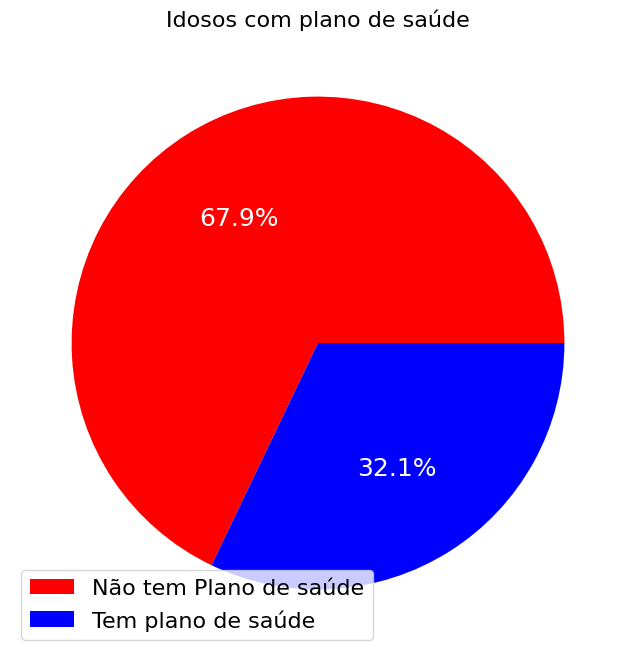

In [10]:
labels = ['Não tem Plano de saúde', 'Tem plano de saúde']
sizes = [10, 8]
colors = ['red', 'blue']



graf = df_60_julho.plot.pie(y='%',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 18})
plt.title('Idosos com plano de saúde',fontsize=16)
plt.axis('off')
plt.legend(labels, loc="best",fontsize=16)

plt.show()